Homework 01. KNN

Task 01

In [1]:
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import pandas as pd


from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [2]:
plt.rcParams["figure.figsize"] = 12, 9
sns.set_style("whitegrid")

SEED = 111
random.seed(SEED)
np.random.seed(SEED)

In [3]:
X, y = fetch_openml(name="Fashion-MNIST", return_X_y=True, as_frame=False)

In [4]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
idx_to_stay = np.random.choice(np.arange(X.shape[0]), replace=False, size=1000)
X = X[idx_to_stay]
y = y[idx_to_stay]

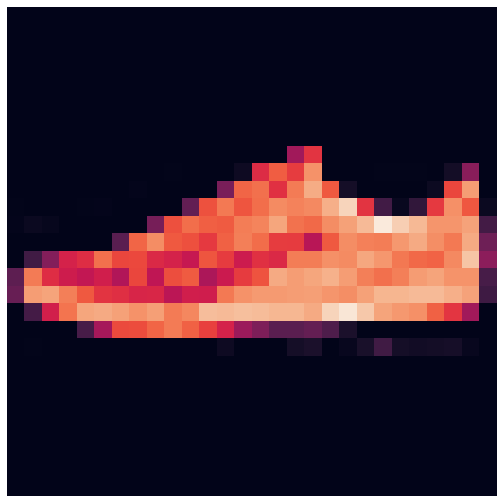

In [6]:
# возьмем случайную картинку и сделаем reshape
# 28, 28, 1 = H, W, C (число каналов, в данном случае 1)
image = X[np.random.choice(np.arange(X.shape[0]))].reshape(28, 28, 1)
plt.imshow(image)
plt.axis("off");

In [7]:
# Draw pictures from different classes
pictures_set = []
classes_list = set(y)

for i in classes_list:
    ind = np.where(y == i)
    pictures_set.append(X[ind[0][0]])
    
# сорри, список арреев - это костыльно, но быстренько освоить нумпай и матплотлиб я все равно не успею, 
# пусть хотя бы так будет

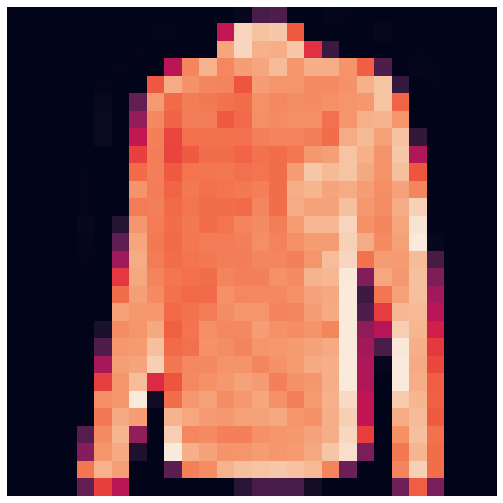

In [8]:
# class '0'
image = pictures_set[0].reshape(28, 28, 1)
plt.imshow(image)
plt.axis("off");

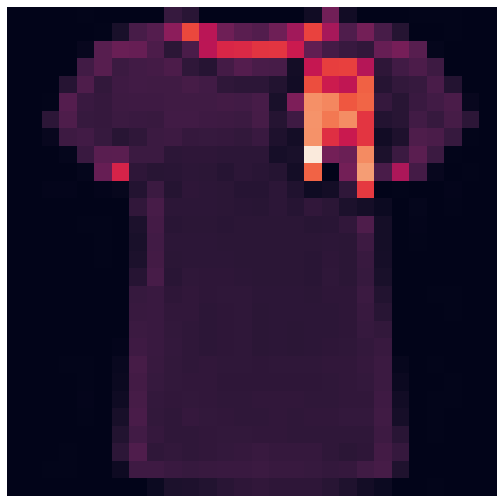

In [9]:
# class '1'
image = pictures_set[1].reshape(28, 28, 1)
plt.imshow(image)
plt.axis("off");

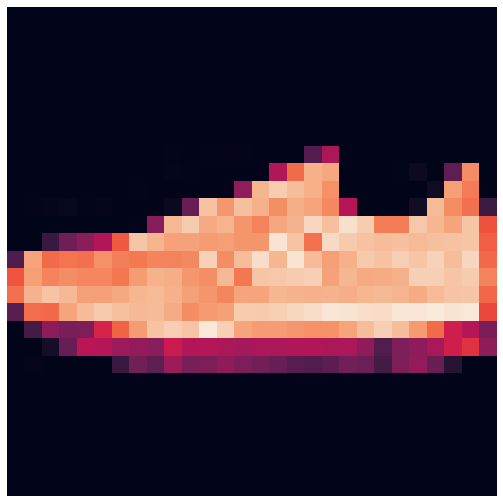

In [10]:
# class '2'
image = pictures_set[2].reshape(28, 28, 1)
plt.imshow(image)
plt.axis("off");

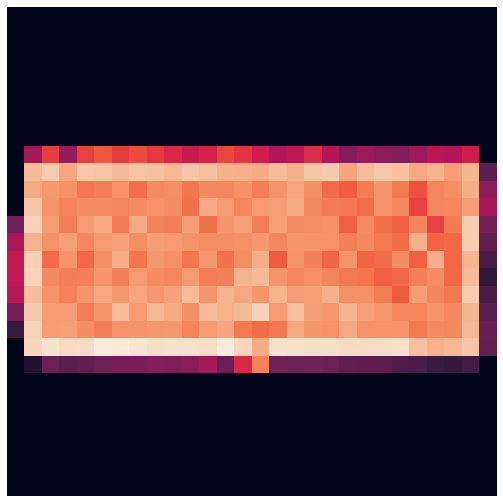

In [11]:
# class '3'
image = pictures_set[3].reshape(28, 28, 1)
plt.imshow(image)
plt.axis("off");

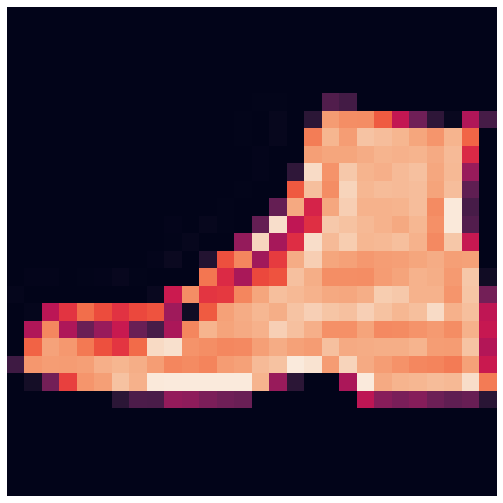

In [12]:
# class '4'
image = pictures_set[4].reshape(28, 28, 1)
plt.imshow(image)
plt.axis("off");

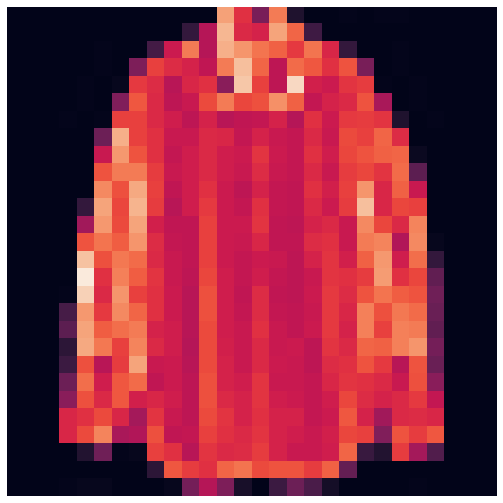

In [13]:
# class '5'
image = pictures_set[5].reshape(28, 28, 1)
plt.imshow(image)
plt.axis("off");

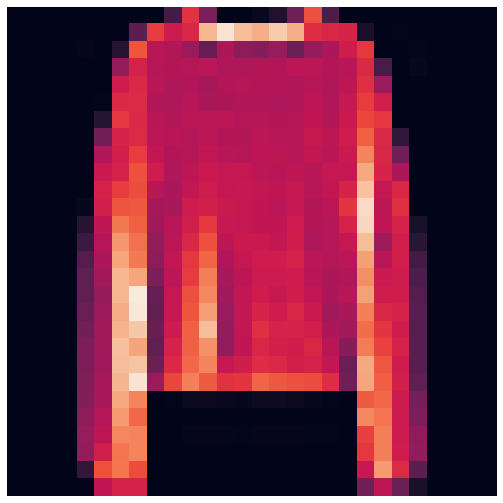

In [14]:
# class '6'
image = pictures_set[6].reshape(28, 28, 1)
plt.imshow(image)
plt.axis("off");

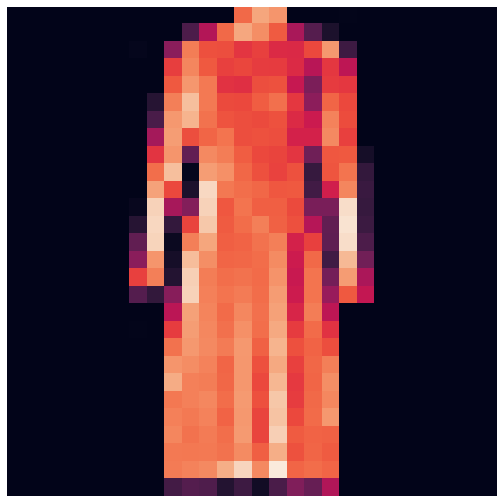

In [15]:
# class '7'
image = pictures_set[7].reshape(28, 28, 1)
plt.imshow(image)
plt.axis("off");

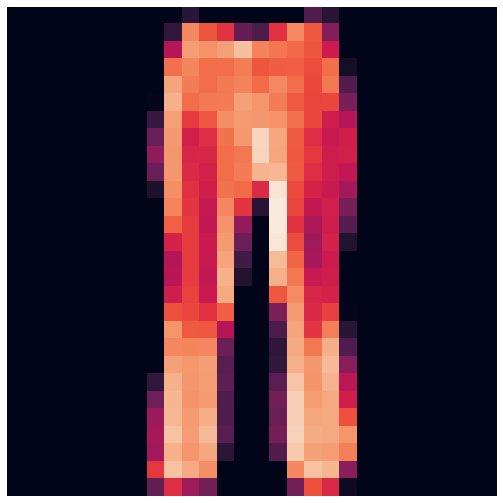

In [16]:
# class '8'
image = pictures_set[8].reshape(28, 28, 1)
plt.imshow(image)
plt.axis("off");

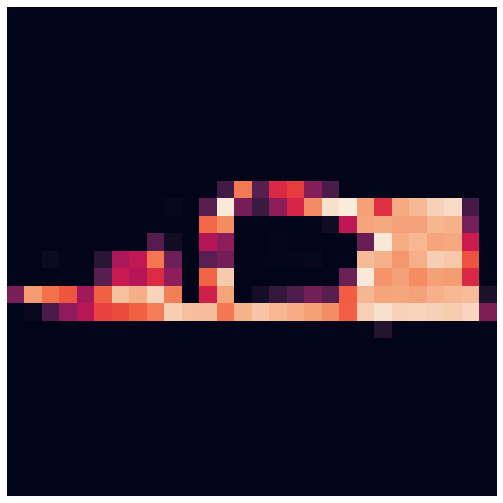

In [17]:
# class '9'
image = pictures_set[9].reshape(28, 28, 1)
plt.imshow(image)
plt.axis("off");

In [18]:
# EDA - class balance

class_balance = {}
for element in classes_list:
    for el in y:
        if el == element:
            if element not in class_balance.keys():
                class_balance[element] = 1
            else:
                class_balance[element] += 1
for key, value in class_balance.items():
    print(key, value)  

    
# кажется, что примерно равномерно объекты распределены по классам

4 96
0 93
7 79
8 109
9 106
6 101
2 95
3 121
1 102
5 98


In [19]:
# Страшное

# только объекты класса "0" и "1"
X_01 = X[(y == "0") + (y == "1")]
y_01 = y[(y == "0") + (y == "1")]

In [20]:
# Train and test splitting

X_train, X_test, y_train, y_test = train_test_split(X_01, y_01, test_size=0.33)

In [21]:
# KNN - не сделано

Task 02

In [22]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

In [23]:
X, y = load_diabetes(as_frame=True, return_X_y=True)

In [24]:
X.head() 
# age - age in years
# sex
# bmi - body mass index
# bp - average blood pressure
# s1 - tc, total serum cholesterol
# s2 - ldl, low-density lipoproteins
# s3 - hdl, high-density lipoproteins
# s4 - tch, total cholesterol / HDL
# s5 - ltg, possibly log of serum triglycerides level
# s6 - glu, blood sugar level 

# n = 442

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [25]:
y 
# y is a quantitative measure of disease progression one year after baseline

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [26]:
# EDA
# From the dataset description (https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset): 
# Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times n_samples 
# (i.e. the sum of squares of each column totals 1).
# Let's check the X and y means and standard deviations
X.mean()

age   -3.639623e-16
sex    1.309912e-16
bmi   -8.013951e-16
bp     1.289818e-16
s1    -9.042540e-17
s2     1.301121e-16
s3    -4.563971e-16
s4     3.863174e-16
s5    -3.848103e-16
s6    -3.398488e-16
dtype: float64

In [27]:
X.std()

age    0.047619
sex    0.047619
bmi    0.047619
bp     0.047619
s1     0.047619
s2     0.047619
s3     0.047619
s4     0.047619
s5     0.047619
s6     0.047619
dtype: float64

In [28]:
y.mean()

152.13348416289594

In [29]:
y.std()

77.09300453299109

In [30]:
# X явно предобработан, т.к. у всех переменных одинаковые ст.отклонения, 
# поэтому ничего не буду делать (ну и еще потому что до дедлайна 2 часа)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [32]:
from sklearn import preprocessing
from sklearn.pipeline import Pipeline

# pipe = Pipeline(steps=[("scaler", StandardScaler()), ("knr", KNeighborsRegressor())]) 
# пайплайн, если бы надо было стандартизовать данные, а потом сунуть их в регрессор
# но они вроде как уже предобработаны, поэтому я не буду его использовать

knr = KNeighborsRegressor()

In [33]:
knr.fit(X_train, y_train)

KNeighborsRegressor()

In [34]:
knr.score(X_train, y_train) # проверим, что с точностью на трейн

0.5609527430491221

In [35]:
knr.score(X_test, y_test) # на тесте

0.3538580298237649

In [36]:
y_pred = knr.predict(X_test) # y_test предсказание на основе X_test

In [37]:
y_pred

array([146.4, 210. , 137.4, 154.6, 108.8,  94.8,  95.8, 158.4, 174. ,
       195.2, 119.4, 140.8,  85.4, 264.2, 177.4, 195. , 103.4, 143.8,
        97.4,  91.8, 186.6, 110.6, 172.6, 155. ,  96.6,  79.2,  93. ,
       173.2, 203.6, 176.8,  84.4, 222.8, 106.8, 137.6,  84. , 154.2,
       162.6, 163. ,  82. ,  80.2, 172.4, 110. , 228.8, 210.6,  85.6,
       101. , 216.8, 200. , 195.2,  85.2,  86.6, 174.4, 145. , 207.2,
        83.2, 133.6, 115.6,  97.6, 246. ,  82. , 174.6, 177. ,  88.4,
       121.6, 125.6,  68.4,  89.8, 279.2, 158.8, 182.8, 105.2, 106. ,
        64.2,  77. , 167. , 221.2, 114.2, 186.4,  84. , 198.2, 131.8,
       284.2, 262.8, 172.8, 213.2, 175.8, 109. , 161.2, 226.2,  78.2,
        77.4, 127. , 182.6, 165.6,  77.4, 138.2, 126.6, 126.6, 122.4,
       271.8, 184.6, 145.6, 106.6, 134.2,  78.4, 148.6, 135.2, 157.8,
        82.2, 158.8,  75.8, 206.4, 206.8,  66. , 118.4, 119.2, 140.4,
       205.8, 152.8,  74. , 179.2, 178.6, 104.2, 160.2, 102. ,  93.6,
       110. , 190.8,

In [38]:
y_test_as_array = np.array(y_test) # чтобы метрики не падали с ошибками

In [39]:
from metrics import r_squared, mse, mae

In [40]:
r_squared(y_pred, y_test_as_array)

0.3538580298237649

In [41]:
mse(y_pred, y_test_as_array)

4128.4402739726

In [42]:
mae(y_pred, y_test_as_array)

51.36575342465752

In [43]:
# Оптимальный k не найден, т.к. функцию find_best_k в 1 задании я не сделала

In [44]:
# социализации нет

In [45]:
# фидбэк: все, что бы я здесь ни написала, будет расценено либо как хамство, либо как нытье, 
# поэтому я просто положу это на гитхаб и пойду спать. 